## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9843347	total: 51.4ms	remaining: 51.4s
1:	learn: 0.9514443	total: 51.7ms	remaining: 25.8s
2:	learn: 0.9194185	total: 52.2ms	remaining: 17.4s
3:	learn: 0.8883544	total: 52.5ms	remaining: 13.1s
4:	learn: 0.8629187	total: 52.9ms	remaining: 10.5s
5:	learn: 0.8343168	total: 53.4ms	remaining: 8.85s
6:	learn: 0.8112356	total: 53.8ms	remaining: 7.63s
7:	learn: 0.7875756	total: 54.3ms	remaining: 6.73s
8:	learn: 0.7616835	total: 54.6ms	remaining: 6.01s
9:	learn: 0.7376765	total: 55.1ms	remaining: 5.45s
10:	learn: 0.7140346	total: 55.5ms	remaining: 4.99s
11:	learn: 0.6908024	total: 55.8ms	remaining: 4.59s
12:	learn: 0.6688499	total: 56.2ms	remaining: 4.26s


13:	learn: 0.6496638	total: 57.1ms	remaining: 4.03s
14:	learn: 0.6290538	total: 57.5ms	remaining: 3.77s
15:	learn: 0.6103415	total: 57.9ms	remaining: 3.56s
16:	learn: 0.5908871	total: 59ms	remaining: 3.41s
17:	learn: 0.5735166	total: 59.2ms	remaining: 3.23s
18:	learn: 0.5565432	total: 59.4ms	remaining: 3.07s
19:	learn: 0.5428563	total: 59.6ms	remaining: 2.92s
20:	learn: 0.5255003	total: 61.2ms	remaining: 2.85s
21:	learn: 0.5090072	total: 61.5ms	remaining: 2.73s
22:	learn: 0.4952281	total: 61.7ms	remaining: 2.62s
23:	learn: 0.4799829	total: 62.1ms	remaining: 2.53s
24:	learn: 0.4646972	total: 63.2ms	remaining: 2.46s
25:	learn: 0.4502530	total: 64.1ms	remaining: 2.4s
26:	learn: 0.4372830	total: 64.7ms	remaining: 2.33s
27:	learn: 0.4246587	total: 65.1ms	remaining: 2.26s
28:	learn: 0.4124757	total: 65.7ms	remaining: 2.2s
29:	learn: 0.4001635	total: 66.3ms	remaining: 2.14s
30:	learn: 0.3904099	total: 66.7ms	remaining: 2.08s
31:	learn: 0.3810544	total: 67.1ms	remaining: 2.03s
32:	learn: 0.371

156:	learn: 0.0480160	total: 144ms	remaining: 774ms
157:	learn: 0.0477790	total: 145ms	remaining: 774ms
158:	learn: 0.0475970	total: 154ms	remaining: 814ms
159:	learn: 0.0473953	total: 156ms	remaining: 819ms
160:	learn: 0.0471340	total: 157ms	remaining: 817ms
161:	learn: 0.0468785	total: 157ms	remaining: 815ms
162:	learn: 0.0466246	total: 159ms	remaining: 816ms
163:	learn: 0.0464766	total: 161ms	remaining: 822ms
164:	learn: 0.0462626	total: 162ms	remaining: 819ms
165:	learn: 0.0460748	total: 162ms	remaining: 815ms
166:	learn: 0.0458297	total: 163ms	remaining: 813ms
167:	learn: 0.0456100	total: 164ms	remaining: 811ms
168:	learn: 0.0454125	total: 165ms	remaining: 810ms
169:	learn: 0.0451725	total: 166ms	remaining: 811ms
170:	learn: 0.0449996	total: 169ms	remaining: 822ms
171:	learn: 0.0448090	total: 171ms	remaining: 822ms
172:	learn: 0.0446168	total: 172ms	remaining: 822ms
173:	learn: 0.0444597	total: 173ms	remaining: 821ms
174:	learn: 0.0442865	total: 178ms	remaining: 839ms
175:	learn: 

181:	learn: 0.0430247	total: 187ms	remaining: 842ms
182:	learn: 0.0428663	total: 188ms	remaining: 841ms
183:	learn: 0.0426525	total: 190ms	remaining: 842ms
184:	learn: 0.0424483	total: 192ms	remaining: 847ms
185:	learn: 0.0422913	total: 196ms	remaining: 857ms
186:	learn: 0.0422042	total: 198ms	remaining: 860ms
187:	learn: 0.0420500	total: 199ms	remaining: 858ms
188:	learn: 0.0418369	total: 199ms	remaining: 855ms
189:	learn: 0.0416733	total: 200ms	remaining: 853ms
190:	learn: 0.0413900	total: 200ms	remaining: 849ms
191:	learn: 0.0412073	total: 201ms	remaining: 847ms
192:	learn: 0.0410736	total: 202ms	remaining: 846ms
193:	learn: 0.0409355	total: 203ms	remaining: 845ms
194:	learn: 0.0407562	total: 204ms	remaining: 842ms
195:	learn: 0.0405406	total: 205ms	remaining: 841ms
196:	learn: 0.0403705	total: 206ms	remaining: 840ms
197:	learn: 0.0402702	total: 207ms	remaining: 838ms
198:	learn: 0.0399914	total: 207ms	remaining: 835ms
199:	learn: 0.0397953	total: 208ms	remaining: 832ms
200:	learn: 

313:	learn: 0.0288240	total: 283ms	remaining: 619ms
314:	learn: 0.0287968	total: 285ms	remaining: 620ms
315:	learn: 0.0286762	total: 286ms	remaining: 619ms
316:	learn: 0.0286503	total: 286ms	remaining: 617ms
317:	learn: 0.0286153	total: 287ms	remaining: 615ms
318:	learn: 0.0285349	total: 287ms	remaining: 613ms
319:	learn: 0.0284256	total: 288ms	remaining: 612ms
320:	learn: 0.0283747	total: 288ms	remaining: 610ms
321:	learn: 0.0283125	total: 289ms	remaining: 608ms
322:	learn: 0.0282489	total: 289ms	remaining: 606ms
323:	learn: 0.0281732	total: 290ms	remaining: 605ms
324:	learn: 0.0281102	total: 291ms	remaining: 604ms
325:	learn: 0.0280475	total: 291ms	remaining: 602ms
326:	learn: 0.0279985	total: 292ms	remaining: 601ms
327:	learn: 0.0279545	total: 292ms	remaining: 599ms
328:	learn: 0.0279066	total: 293ms	remaining: 597ms
329:	learn: 0.0278774	total: 293ms	remaining: 595ms
330:	learn: 0.0278362	total: 294ms	remaining: 594ms
331:	learn: 0.0277922	total: 294ms	remaining: 592ms
332:	learn: 

417:	learn: 0.0235001	total: 335ms	remaining: 466ms
418:	learn: 0.0234675	total: 335ms	remaining: 465ms
419:	learn: 0.0234343	total: 338ms	remaining: 466ms
420:	learn: 0.0234064	total: 338ms	remaining: 465ms
421:	learn: 0.0233909	total: 339ms	remaining: 464ms
422:	learn: 0.0233570	total: 339ms	remaining: 463ms
423:	learn: 0.0233289	total: 340ms	remaining: 461ms
424:	learn: 0.0233038	total: 340ms	remaining: 460ms
425:	learn: 0.0232536	total: 340ms	remaining: 459ms
426:	learn: 0.0232295	total: 341ms	remaining: 457ms
427:	learn: 0.0231953	total: 341ms	remaining: 456ms
428:	learn: 0.0231124	total: 342ms	remaining: 455ms
429:	learn: 0.0230648	total: 342ms	remaining: 453ms
430:	learn: 0.0230266	total: 342ms	remaining: 452ms
431:	learn: 0.0230095	total: 343ms	remaining: 451ms
432:	learn: 0.0229783	total: 343ms	remaining: 450ms
433:	learn: 0.0229525	total: 344ms	remaining: 449ms
434:	learn: 0.0229032	total: 344ms	remaining: 447ms
435:	learn: 0.0228703	total: 345ms	remaining: 446ms
436:	learn: 

600:	learn: 0.0184909	total: 430ms	remaining: 285ms
601:	learn: 0.0184768	total: 432ms	remaining: 285ms
602:	learn: 0.0184519	total: 432ms	remaining: 284ms
603:	learn: 0.0184450	total: 436ms	remaining: 286ms
604:	learn: 0.0184307	total: 443ms	remaining: 289ms
605:	learn: 0.0184127	total: 444ms	remaining: 289ms
606:	learn: 0.0183925	total: 447ms	remaining: 289ms
607:	learn: 0.0183768	total: 449ms	remaining: 289ms
608:	learn: 0.0183551	total: 450ms	remaining: 289ms
609:	learn: 0.0183414	total: 451ms	remaining: 288ms
610:	learn: 0.0183252	total: 452ms	remaining: 288ms
611:	learn: 0.0183074	total: 452ms	remaining: 287ms
612:	learn: 0.0182914	total: 453ms	remaining: 286ms
613:	learn: 0.0182778	total: 454ms	remaining: 285ms
614:	learn: 0.0182649	total: 454ms	remaining: 284ms
615:	learn: 0.0182324	total: 454ms	remaining: 283ms
616:	learn: 0.0182196	total: 455ms	remaining: 282ms
617:	learn: 0.0182051	total: 455ms	remaining: 281ms
618:	learn: 0.0181901	total: 456ms	remaining: 280ms
619:	learn: 

625:	learn: 0.0180712	total: 470ms	remaining: 281ms
626:	learn: 0.0180422	total: 471ms	remaining: 280ms
627:	learn: 0.0180298	total: 472ms	remaining: 279ms
628:	learn: 0.0180123	total: 479ms	remaining: 283ms
629:	learn: 0.0179918	total: 480ms	remaining: 282ms
630:	learn: 0.0179718	total: 480ms	remaining: 281ms
631:	learn: 0.0179598	total: 481ms	remaining: 280ms
632:	learn: 0.0179270	total: 484ms	remaining: 280ms
633:	learn: 0.0179145	total: 485ms	remaining: 280ms
634:	learn: 0.0179029	total: 489ms	remaining: 281ms
635:	learn: 0.0178869	total: 490ms	remaining: 280ms
636:	learn: 0.0178791	total: 491ms	remaining: 280ms
637:	learn: 0.0178452	total: 491ms	remaining: 279ms
638:	learn: 0.0178200	total: 492ms	remaining: 278ms
639:	learn: 0.0178138	total: 493ms	remaining: 277ms
640:	learn: 0.0177909	total: 494ms	remaining: 277ms
641:	learn: 0.0177680	total: 496ms	remaining: 277ms
642:	learn: 0.0177566	total: 503ms	remaining: 279ms
643:	learn: 0.0177299	total: 504ms	remaining: 279ms
644:	learn: 

667:	learn: 0.0173364	total: 544ms	remaining: 270ms
668:	learn: 0.0173317	total: 548ms	remaining: 271ms
669:	learn: 0.0173203	total: 549ms	remaining: 270ms
670:	learn: 0.0173067	total: 550ms	remaining: 270ms
671:	learn: 0.0172919	total: 551ms	remaining: 269ms
672:	learn: 0.0172423	total: 552ms	remaining: 268ms
673:	learn: 0.0172157	total: 553ms	remaining: 267ms
674:	learn: 0.0171940	total: 553ms	remaining: 266ms
675:	learn: 0.0171805	total: 554ms	remaining: 266ms
676:	learn: 0.0171666	total: 555ms	remaining: 265ms
677:	learn: 0.0171526	total: 556ms	remaining: 264ms
678:	learn: 0.0171263	total: 556ms	remaining: 263ms
679:	learn: 0.0171193	total: 558ms	remaining: 262ms
680:	learn: 0.0170964	total: 558ms	remaining: 262ms
681:	learn: 0.0170763	total: 559ms	remaining: 260ms
682:	learn: 0.0170634	total: 559ms	remaining: 260ms
683:	learn: 0.0170493	total: 560ms	remaining: 259ms
684:	learn: 0.0170254	total: 560ms	remaining: 258ms
685:	learn: 0.0170195	total: 561ms	remaining: 257ms
686:	learn: 

759:	learn: 0.0160659	total: 599ms	remaining: 189ms
760:	learn: 0.0160572	total: 600ms	remaining: 188ms
761:	learn: 0.0160458	total: 601ms	remaining: 188ms
762:	learn: 0.0160357	total: 601ms	remaining: 187ms
763:	learn: 0.0160334	total: 602ms	remaining: 186ms
764:	learn: 0.0160127	total: 602ms	remaining: 185ms
765:	learn: 0.0160027	total: 603ms	remaining: 184ms
766:	learn: 0.0159912	total: 603ms	remaining: 183ms
767:	learn: 0.0159818	total: 603ms	remaining: 182ms
768:	learn: 0.0159594	total: 604ms	remaining: 181ms
769:	learn: 0.0159480	total: 604ms	remaining: 181ms
770:	learn: 0.0159427	total: 605ms	remaining: 180ms
771:	learn: 0.0159320	total: 606ms	remaining: 179ms
772:	learn: 0.0159176	total: 606ms	remaining: 178ms
773:	learn: 0.0159068	total: 606ms	remaining: 177ms
774:	learn: 0.0159014	total: 607ms	remaining: 176ms
775:	learn: 0.0158923	total: 607ms	remaining: 175ms
776:	learn: 0.0158787	total: 608ms	remaining: 174ms
777:	learn: 0.0158729	total: 608ms	remaining: 174ms
778:	learn: 

964:	learn: 0.0139096	total: 692ms	remaining: 25.1ms
965:	learn: 0.0138986	total: 693ms	remaining: 24.4ms
966:	learn: 0.0138937	total: 694ms	remaining: 23.7ms
967:	learn: 0.0138796	total: 695ms	remaining: 23ms
968:	learn: 0.0138747	total: 695ms	remaining: 22.2ms
969:	learn: 0.0138684	total: 696ms	remaining: 21.5ms
970:	learn: 0.0138644	total: 697ms	remaining: 20.8ms
971:	learn: 0.0138595	total: 697ms	remaining: 20.1ms
972:	learn: 0.0138520	total: 698ms	remaining: 19.4ms
973:	learn: 0.0138493	total: 698ms	remaining: 18.6ms
974:	learn: 0.0138428	total: 698ms	remaining: 17.9ms
975:	learn: 0.0138371	total: 699ms	remaining: 17.2ms
976:	learn: 0.0138309	total: 699ms	remaining: 16.5ms
977:	learn: 0.0138230	total: 700ms	remaining: 15.7ms
978:	learn: 0.0137998	total: 700ms	remaining: 15ms
979:	learn: 0.0137942	total: 701ms	remaining: 14.3ms
980:	learn: 0.0137923	total: 701ms	remaining: 13.6ms
981:	learn: 0.0137862	total: 701ms	remaining: 12.9ms
982:	learn: 0.0137837	total: 702ms	remaining: 12.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.023625736316083345
ABC Pre-generator MAE 1.2772431162717892


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

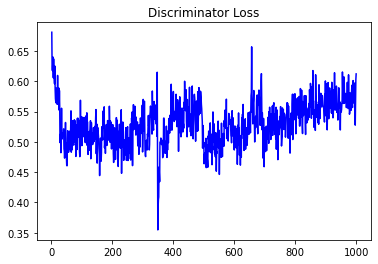

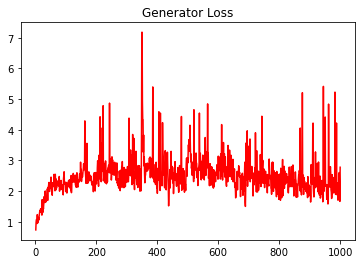

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.07586433682929386


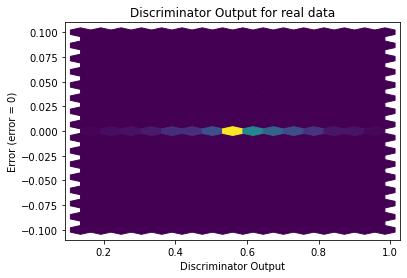

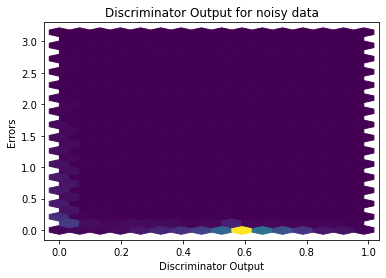

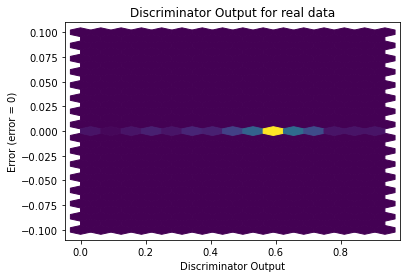

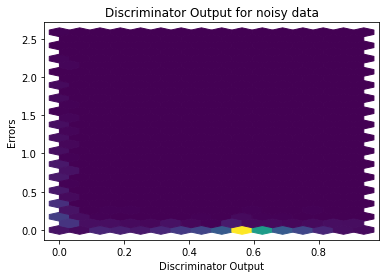

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


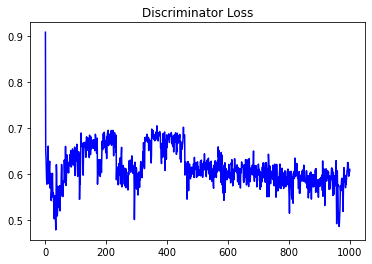

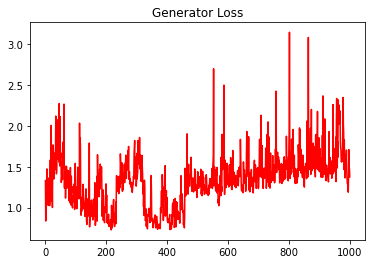

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.10801414141020217


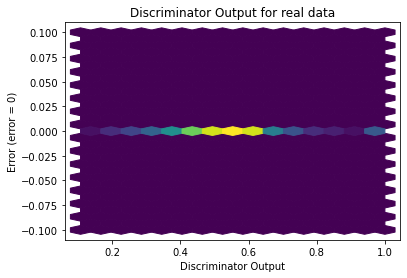

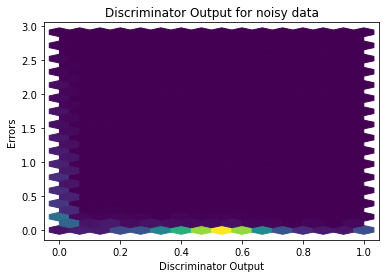

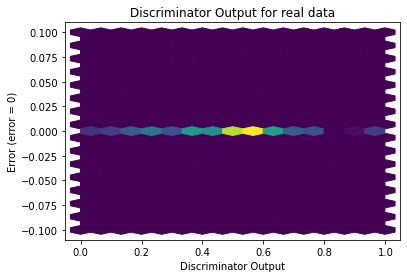

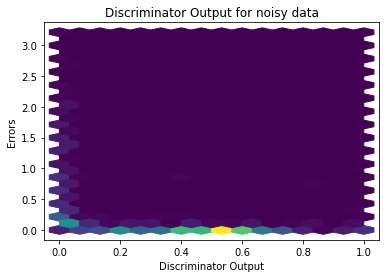

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


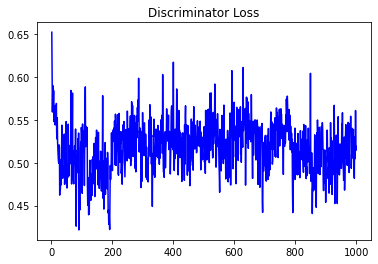

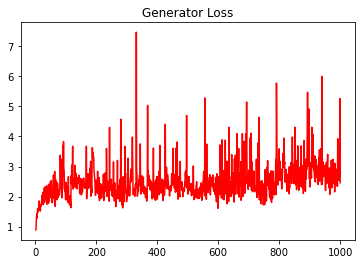

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.12473805667130979


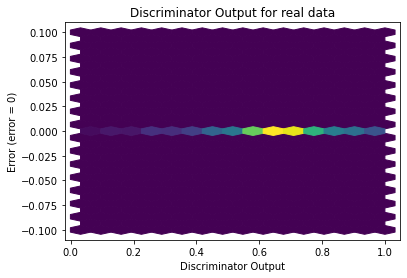

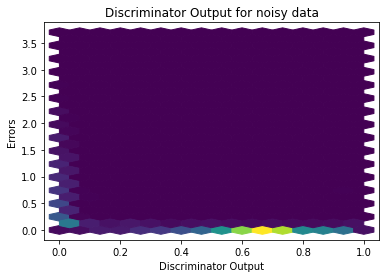

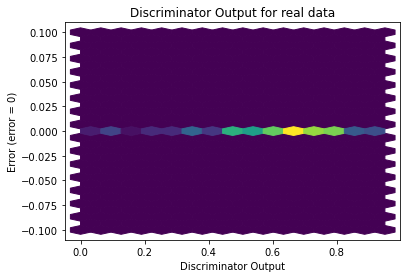

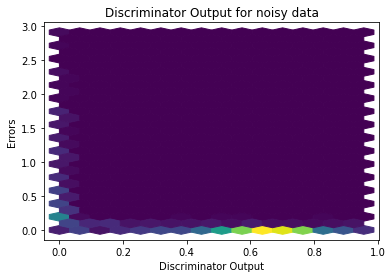

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9581]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9869]], requires_grad=True)
